# 1. Import Hourly Data

In [1]:
#------- Daily-Hourly Count Visualize----------#
#
# part-1: 1-day-24-hour
# part-2: 1-week-24-hour
# part-3: 1-week-7-day
# part-4: 1-month-4-week
# part-5: 1-month-30-day
# part-6: 12-month-365-day  #Q: Date Continuous???
# part-7: 3-year

import json
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn import cross_validation
from sklearn import linear_model
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')

with open('hourly_data.json','rb') as f:
    hourly_data=f.readlines()
    # list,len=1

# Load hourly_data
hourly_data=json.loads(hourly_data[0])

print 'import done'

import done


In [2]:
dict_slice=lambda one_dict,start,end: dict((k,one_dict[k]) for k in one_dict.keys()[start:end])

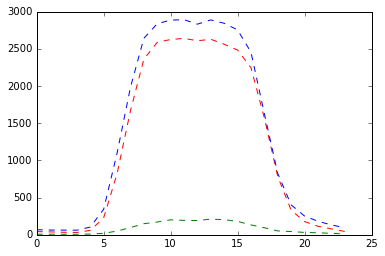

In [3]:
#------- part-1: 1-day-24-hour ----------#

t=np.arange(0,24,1)
plt.plot(t,hourly_data['2013-02-13'],'g--',hourly_data['2014-02-12'],'r--',hourly_data['2015-02-11'],'b--')
plt.show()

In [27]:
len(hourly_data.keys())

1157

In [9]:
sorted(hourly_data.keys())[396]

u'2014-01-01'

In [33]:
sorted(hourly_data.keys())[-1]

u'2016-01-31'

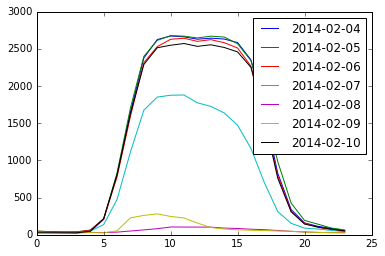

In [13]:
#------- part-2: 1-week-24-hour ----------#

for date in sorted(hourly_data.keys())[430:437]:
    plt.plot(t,hourly_data[date],label=date)    
    plt.legend()

## 2. Create Daily Data

In [14]:
#------- part-3: 1-week-7-day ----------#
#
#------- Calculate Daily Count from Hourly Data

dict_sum=lambda one_dict,start,end: dict((str(k),sum(one_dict[k])) for k in one_dict.keys()[start:end])

In [15]:
daily_data=dict_sum(hourly_data,0,len(hourly_data.keys()))

In [16]:
dict_slice(daily_data,0,7)

{'2013-04-18': 2510,
 '2013-07-05': 810,
 '2013-07-06': 321,
 '2013-07-07': 490,
 '2014-06-30': 25981,
 '2014-10-16': 28203,
 '2015-11-19': 28110}

In [192]:
#------- Make Sorted daily_data arranged by Date
# 1
# import operator
# sorted_daily_data=sorted(daily_data.items(),key=operator.itemgetter(0))
# 2
# dict_test={}
# for k in sorted(daily_data.keys()):
#     #print k,daily_data[k]
#     dict_test[k]=daily_data[k]
# print dict_test

# zip( *sorted(daily_data.items(), key=lambda x:x[0] ) )[0]
# zip( *sorted(daily_data.items(), key=lambda x:x[0] ) )[1]
# zip( *sorted(daily_data.items(), key=lambda x:x[0] ) )

In [178]:
#daily_data
#daily_data.items()
daily_data['2012-12-01']

196

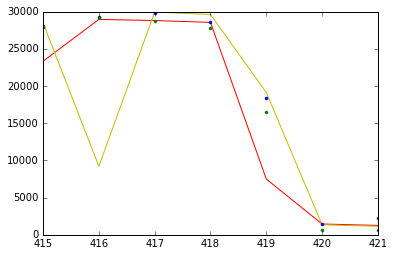

In [39]:
#------- part-3: 1-week-7-day
#------- part-4: 1-month-4-week
#
# pylab.plot( *zip( *sorted(daily_data.items(), key=lambda x:x[0] ) ) )

start=415
end=422

d=np.arange(start,end,1)

plt.plot(d,zip(*sorted(daily_data.items(), key=lambda x:x[0]))[1][start:end],'r') #2012-12-03 M,2012-12-09 S
plt.plot(d,zip(*sorted(daily_data.items(), key=lambda x:x[0]))[1][start+7:end+7],'y') #2012-12-10 M,2012-12-16 S
plt.plot(d,zip(*sorted(daily_data.items(), key=lambda x:x[0]))[1][start+7*2:end+7*2],'.b') #2012-12-17 M,2012-12-23 S
plt.plot(d,zip(*sorted(daily_data.items(), key=lambda x:x[0]))[1][start+7*3:end+7*3],'.g') #2012-12-24 M,2012-12-30 S
plt.show()

In [45]:
sorted(daily_data.items())[429:436]

[('2014-02-03', 27952),
 ('2014-02-04', 29250),
 ('2014-02-05', 29867),
 ('2014-02-06', 28547),
 ('2014-02-07', 18397),
 ('2014-02-08', 1395),
 ('2014-02-09', 2198)]

In [48]:
sorted(daily_data.items())[793:800]

[('2015-02-02', 31663),
 ('2015-02-03', 32913),
 ('2015-02-04', 32635),
 ('2015-02-05', 31591),
 ('2015-02-06', 20396),
 ('2015-02-07', 1639),
 ('2015-02-08', 1751)]

In [43]:
zip(*sorted(daily_data.items(), key=lambda x:x[0]))[0][401:408]

('2014-01-06',
 '2014-01-07',
 '2014-01-08',
 '2014-01-09',
 '2014-01-10',
 '2014-01-11',
 '2014-01-12')

## 3. Create Daily Time Series Data

In [71]:
#----------- Part-1: Daily Data  ['Date']>'2013-12-31' & ['Date']<'2016-01-01'

# Date-Count

raw_data = []
for key,value in daily_data.items():
    raw_data.append((key,value))

data_df = pd.DataFrame(raw_data, columns=['Date','#_of_parking'])


#        Year  Week#  Weekday
# 0      2014     27        1
# Decompose Date to Year, Week# & Weekday
pk_df = pd.DataFrame(map(lambda x: x.isocalendar(), pd.to_datetime(data_df['Date'])), columns=['Year','Week#','Weekday'])

# len(pk_df)=27768
pk_df['Date']=data_df['Date']
pk_df['#_of_parking']=data_df['#_of_parking']
            

# len(use_data_df)=18264
# Based on 'Basic_Static.ipynb: part-7' Ignore data of year 2012 & 2013
# len(use_data_df)=761
use_data_df = pk_df[(pk_df['Date']>'2013-12-31') ]

# len(data_train_new)=730
data_train_new = use_data_df[use_data_df['Date']<'2016-01-01']

# Test data
data_test_new = use_data_df[use_data_df['Date']>='2016-01-01']

print data_train_new.head()

    Year  Week#  Weekday        Date  #_of_parking
0   2014     27        1  2014-06-30         25981
1   2014     42        4  2014-10-16         28203
4   2015     47        4  2015-11-19         28110
12  2015     46        6  2015-11-14          1223
15  2014     42        3  2014-10-15         29487


In [72]:
# Sorted daily data
df = data_train_new.sort(['Date'])
# df.head()
df_ts = df.set_index('Date')
# df_ts.index
df_ts.index = pd.to_datetime(df_ts.index)
# df_ts.index
ts = df_ts['#_of_parking']  # 生成pd.Series对象
# 查看数据格式
print ts.head()
print ts.head().index   # 无序的
# 切片
# ts['2014-06']
# ts['2014-01-01':'2014-01-31']

Date
2014-01-01      440
2014-01-02    13292
2014-01-03    11577
2014-01-04      825
2014-01-05     1024
Name: #_of_parking, dtype: int64
DatetimeIndex(['2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04',
               '2014-01-05'],
              dtype='datetime64[ns]', name=u'Date', freq=None)


## 4. 周到日：回归？平均？

## 回归

Automatically created module for IPython interactive environment
[ 5134.04285714 -1614.78571429]
[-1164.02380952  2779.21428571  -732.33333333]


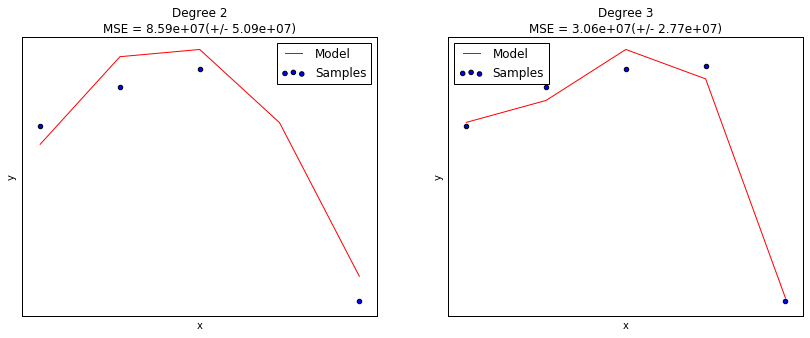

In [40]:
# Just Polynomial
#

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation


degrees = [2,3]


# Train Data
y=zip(*sorted(daily_data.items(), key=lambda x:x[0]))[1][401:406]
X=np.arange(0,len(y))


plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_validation.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="mean_squared_error", cv=2)

    print(pipeline.named_steps["linear_regression"].coef_)
    

    plt.plot(X, pipeline.predict(X[:, np.newaxis]),'-r', label="Model")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


## 同周平均
目标 16/2/1-16/2/7：mon－sun

对应 15/2/2-15/2/8: mon－sun

对应 14/2/3-14/2/9: mon－sun

## 平均：比回归准点

In [77]:
# 2014
y_2014=np.array(ts['2014-02-03':'2014-02-09'])

In [78]:
# 2015
y_2015=np.array(ts['2015-02-02':'2015-02-08'])

In [83]:
# Mean of 2014 2015
y_past_mean=(y_2014+y_2015)/2

In [91]:
y_past_mean
sum(y_past_mean)

array([29807, 31081, 31251, 30069, 19396,  1517,  1974])

In [102]:
from __future__ import division 
week_predict=165320
ratio=round(week_predict/sum(y_past_mean),2)
y_ratio=y_past_mean*ratio

In [136]:
y_ratio

array([ 33979.98,  35432.34,  35626.14,  34278.66,  22111.44,   1729.38,
         2250.36])

In [137]:
round(y_ratio[3])

34279.0

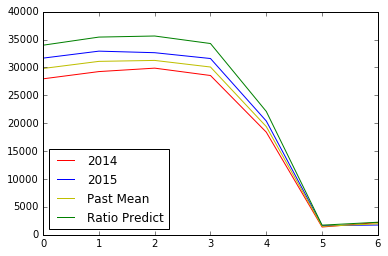

In [106]:
d=np.arange(0,7,1)
plt.plot(d,y_2014,'r',label='2014')
plt.plot(d,y_2015,'b',label='2015')
plt.plot(d,y_past_mean,'y',label='Past Mean')
plt.plot(d,y_ratio,'g',label='Ratio Predict')
plt.legend(loc='best')

## 5. 日到时：分布？平均？

## 分布

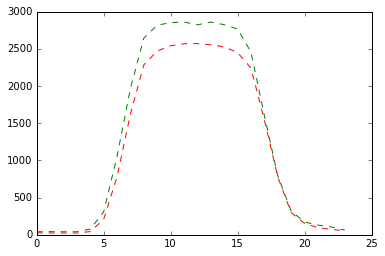

In [107]:
t=np.arange(0,24,1)
plt.plot(t,hourly_data['2015-02-02'],'g--',hourly_data['2014-02-03'],'r--')
plt.show()

[  6.14421235e-06   7.37305482e-05   4.42383289e-04   1.76953316e-03
   5.30859947e-03   1.27406387e-02   2.54812775e-02   4.36821900e-02
   6.55232849e-02   8.73643799e-02   1.04837256e-01   1.14367916e-01
   1.14367916e-01   1.05570384e-01   9.04889002e-02   7.23911201e-02
   5.42933401e-02   3.83247107e-02   2.55498071e-02   1.61367203e-02
   9.68203217e-03   5.53258981e-03   3.01777626e-03   1.57449196e-03]


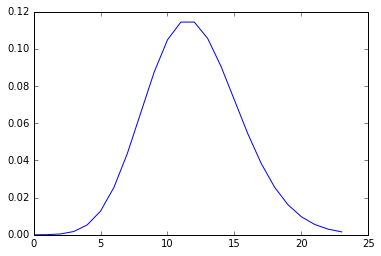

In [174]:
# http://python.jobbole.com/81321/
# http://docs.scipy.org/doc/scipy/reference/stats.html
# http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html#scipy.stats.poisson

# Definition: http://www.ruanyifeng.com/blog/2015/06/poisson-distribution.html

# eg:
from scipy.stats import poisson
rate=12 
n=np.arange(0,24)
y=poisson.pmf(n,rate)
print y
plt.plot(n,y)

In [176]:
sum(hourly_data['2015-02-02'])

31663

In [177]:
sum(hourly_data['2015-02-02'])*y

array([  1.94544196e-01,   2.33453035e+00,   1.40071821e+01,
         5.60287284e+01,   1.68086185e+02,   4.03406844e+02,
         8.06813689e+02,   1.38310918e+03,   2.07466377e+03,
         2.76621836e+03,   3.31946203e+03,   3.62123131e+03,
         3.62123131e+03,   3.34267505e+03,   2.86515005e+03,
         2.29212004e+03,   1.71909003e+03,   1.21347531e+03,
         8.08983543e+02,   5.10936974e+02,   3.06562185e+02,
         1.75178391e+02,   9.55518497e+01,   4.98531390e+01])

In [187]:
y_pos=sum(hourly_data['2015-02-02'])*y
y_poisson=[]
for i in range(len(y)):
    y_pos[i]=round(y_pos[i])
    y_poisson.append(y_pos[i])

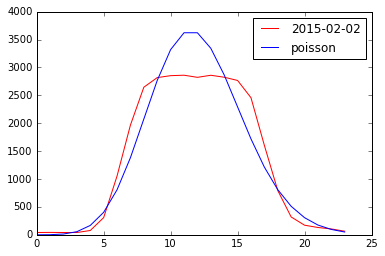

In [193]:
# y_poisson: sum*probability
plt.plot(np.arange(0,24),hourly_data['2015-02-02'],'r',label='2015-02-02')
plt.plot(np.arange(0,24),y_poisson,'b',label='poisson')
plt.legend(loc='best')

In [190]:
print sum(hourly_data['2015-02-02'])
print sum(y_poisson)

31663
31615.0


In [192]:
print hourly_data['2015-02-02']
print y_poisson

[41, 43, 41, 41, 77, 308, 1054, 1967, 2645, 2817, 2852, 2860, 2822, 2859, 2824, 2766, 2457, 1603, 794, 320, 172, 131, 105, 64]
[0.0, 2.0, 14.0, 56.0, 168.0, 403.0, 807.0, 1383.0, 2075.0, 2766.0, 3319.0, 3621.0, 3621.0, 3343.0, 2865.0, 2292.0, 1719.0, 1213.0, 809.0, 511.0, 307.0, 175.0, 96.0, 50.0]


## 平均：比分布准

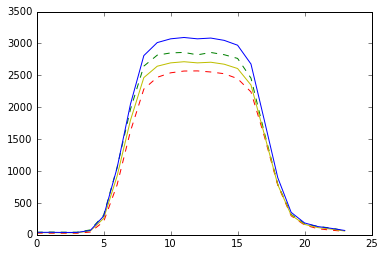

In [161]:
t=np.arange(0,24,1)
day_predict=y_ratio[0]
hour_mean=(np.array(hourly_data['2015-02-02'])+np.array(hourly_data['2014-02-03']))/2
ratio_hour=day_predict/sum(hour_mean)
hour_predict=hour_mean*ratio_hour
for i in range(len(hour_predict)):
    hour_predict[i]=round(hour_predict[i])

plt.plot(t,hourly_data['2015-02-02'],'g--',hourly_data['2014-02-03'],'r--')
plt.plot(t,hour_mean,'y',label='hour mean')
plt.plot(t,hour_predict,'b',label='hour ratio predict')
plt.show()